# VGG
Ho Hon Lawrence SO  
Department of Physics, The University of Hong Kong  
SPSC7014 Big Data, AI and Machine Learning in Space Science  
Dr Alex P LEUNG  
Friday, 1<sup>st</sup> April 2023

<div class="alert alert-block alert-info"> <b>Tip:</b> A online version of this notebook could be found <a href="url">here</a>. It was hosted on Github and powered by Google Colab. </div>

## 0. Download images from Github

In [1]:
import urllib.request
url_dir = "https://raw.githubusercontent.com/hhlso22/SPSC7014/main/img/";
for i in range(9):
    fname = "dog" + str(i) + ".jpg";
    url = url_dir + fname;
    urllib.request.urlretrieve(url, fname);

## 1. Example code from question

### 1.1. Libraries

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
# load model
model = VGG16()
# summarize the model
model.summary()
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 1.2. Preprocessing

In [3]:
# load an image from file
image = load_img("dog0.jpg", target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

### 1.3. Applying the model

In [4]:
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

1/1 [==============================] - 1s 517ms/step


### 1.4. Results

In [5]:
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

black-and-tan_coonhound (88.51%)


## 2. Comparison with other models

To do the comparison, multiple images were used for a better understanding.

### 2.1. Import more libraries

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2.2. Image directories

In [7]:
#list of the image directories
dir_ls = ["dog"+str(i)+".jpg" for i in range(9)];

### 2.2. Show all the images for testing

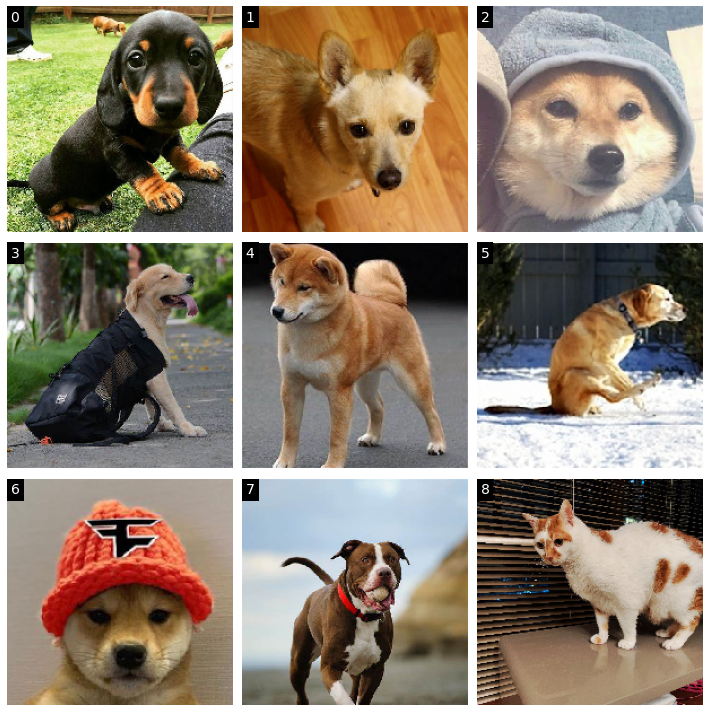

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for i in range(9):
    img = load_img(dir_ls[i], target_size=(200, 200));
    img = img_to_array(img)/255.0;
    axes[i].imshow(img);
    axes[i].axis('off');
    axes[i].text(0.015,0.985, str(i), fontsize=14,
                 verticalalignment='top', color='w',
                 bbox=dict(facecolor='k', edgecolor="none"),
                 transform=axes[i].transAxes);
plt.tight_layout();
plt.show();

### 2.3. Load the other models

In [9]:
#the models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50

#the preprocess_input (preIn)
from tensorflow.keras.applications.vgg16 import preprocess_input as VGG16_preIn
from tensorflow.keras.applications.vgg19 import preprocess_input as VGG19_preIn
from tensorflow.keras.applications.inception_v3 import preprocess_input as InV3_preIn
from tensorflow.keras.applications.resnet50 import preprocess_input as RN50_preIn

#the decode predictions (dePre)
from tensorflow.keras.applications.vgg16 import decode_predictions as VGG16_dePre
from tensorflow.keras.applications.vgg19 import decode_predictions as VGG19_dePre
from tensorflow.keras.applications.inception_v3 import decode_predictions as InV3_dePre
from tensorflow.keras.applications.resnet50 import decode_predictions as RN50_dePre

### 2.5. Apply the models to the different images

An automatic method was attempted, but parameters between models was quite significant, so the models are computed one by one.

#### 2.5.1. VGG16

In [10]:
#load images from file
vgg16_img = [load_img(dir_, target_size=(224, 224)) for dir_ in dir_ls];
#convert images to numpy arrays
vgg16_img = [img_to_array(img) for img in vgg16_img];
#reshape data for the model
vgg16_img = [img.reshape((1, img.shape[0], img.shape[1], img.shape[2])) for img in vgg16_img];
#prepare the image for the model
vgg16_img = [VGG16_preIn(img) for img in vgg16_img];
#predict the probability across all output classes
vgg16_yhat = [VGG16().predict(img) for img in vgg16_img];
# convert the probabilities to class labels
vgg16_lab = [VGG16_dePre(yhat) for yhat in vgg16_yhat];
# retrieve the most likely result, e.g. highest probability
vgg16_lab = [lab[0][0] for lab in vgg16_lab];

1/1 [==============================] - 0s 325ms/step


#### 2.5.2. VGG19

In [11]:
#load images from file
vgg19_img = [load_img(dir_, target_size=(224, 224)) for dir_ in dir_ls];
#convert images to numpy arrays
vgg19_img = [img_to_array(img) for img in vgg19_img];
#reshape data for the model
vgg19_img = [img.reshape((1, img.shape[0], img.shape[1], img.shape[2])) for img in vgg19_img];
#prepare the image for the model
vgg19_img = [VGG19_preIn(img) for img in vgg19_img];
#predict the probability across all output classes
vgg19_yhat = [VGG19().predict(img) for img in vgg19_img];
# convert the probabilities to class labels
vgg19_lab = [VGG19_dePre(yhat) for yhat in vgg19_yhat];
# retrieve the most likely result, e.g. highest probability
vgg19_lab = [lab[0][0] for lab in vgg19_lab];

1/1 [==============================] - 0s 395ms/step


#### 2.5.3. Inception V3

In [12]:
#load images from file
inv3_img = [load_img(dir_, target_size=(299, 299)) for dir_ in dir_ls];
#convert images to numpy arrays
inv3_img = [img_to_array(img) for img in inv3_img];
#reshape data for the model
inv3_img = [img.reshape((1, img.shape[0], img.shape[1], img.shape[2])) for img in inv3_img];
#prepare the image for the model
inv3_img = [InV3_preIn(img) for img in inv3_img];
#predict the probability across all output classes
inv3_yhat = [InceptionV3().predict(img) for img in inv3_img];
# convert the probabilities to class labels
inv3_lab = [InV3_dePre(yhat) for yhat in inv3_yhat];
# retrieve the most likely result, e.g. highest probability
inv3_lab = [lab[0][0] for lab in inv3_lab];

1/1 [==============================] - 2s 2s/step


#### 2.5.4. ResNet 50

In [13]:
#load images from file
rn50_img = [load_img(dir_, target_size=(224, 224)) for dir_ in dir_ls];
#convert images to numpy arrays
rn50_img = [img_to_array(img) for img in rn50_img];
#reshape data for the model
rn50_img = [img.reshape((1, img.shape[0], img.shape[1], img.shape[2])) for img in rn50_img];
#prepare the image for the model
rn50_img = [RN50_preIn(img) for img in rn50_img];
#predict the probability across all output classes
rn50_yhat = [ResNet50().predict(img) for img in rn50_img];
# convert the probabilities to class labels
rn50_lab = [RN50_dePre(yhat) for yhat in rn50_yhat];
# retrieve the most likely result, e.g. highest probability
rn50_lab = [lab[0][0] for lab in rn50_lab];

1/1 [==============================] - 2s 2s/step


### 2.6. Show the results

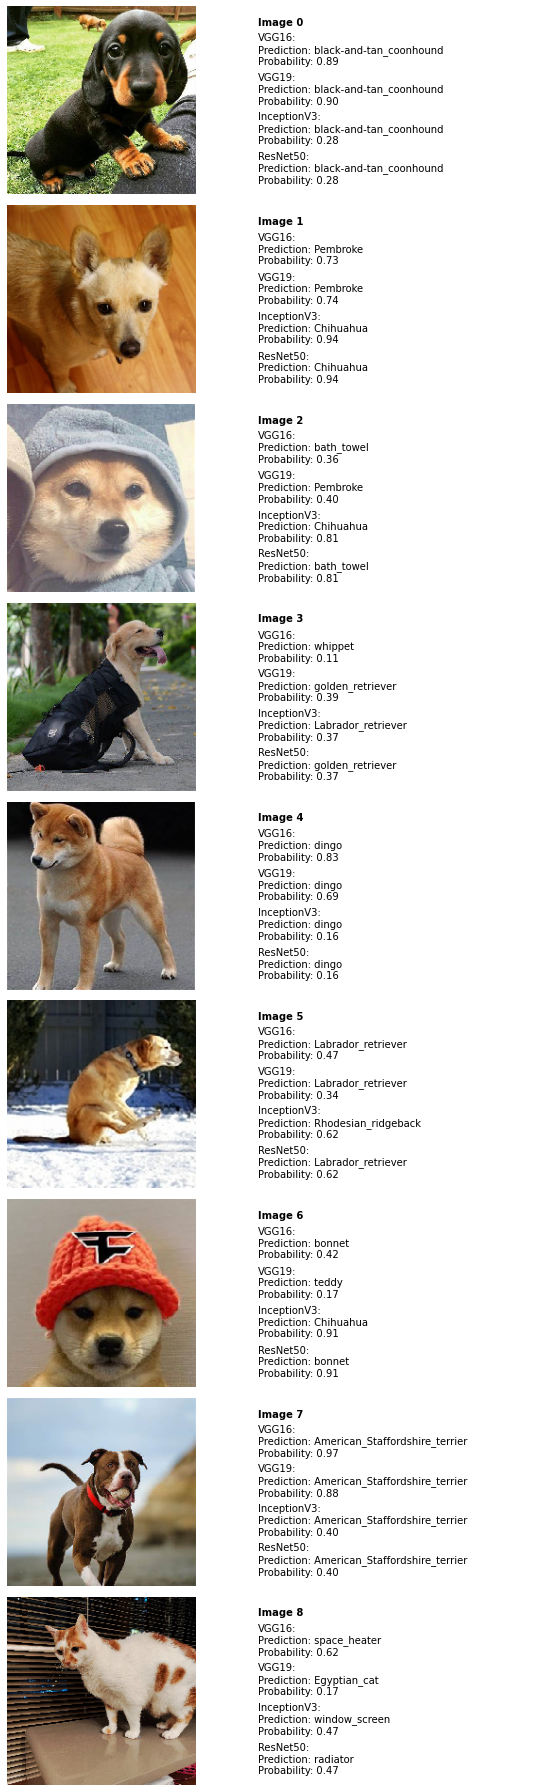

In [14]:
fig2, ax2 = plt.subplots(9, 2, figsize=(9, 25))

for i in range(9):
    img = load_img(dir_ls[i], target_size=(200, 200));
    img = img_to_array(img)/255.0;
    ax2[i, 0].imshow(img);
    ax2[i, 0].axis('off');
    ax2[i, 1].text(0.1, 0.9,
                   "Image "+str(i), fontweight="bold");
    ax2[i, 1].text(0.1, 0.69,
                   "VGG16:\nPrediction: {}\nProbability: {:.2f}".format(
                       vgg16_lab[i][1], vgg16_lab[i][2]), fontsize=10);
    ax2[i, 1].text(0.1, 0.48, 
                   "VGG19:\nPrediction: {}\nProbability: {:.2f}".format(
                       vgg19_lab[i][1], vgg19_lab[i][2]), fontsize=10);
    ax2[i, 1].text(0.1, 0.27, 
                   "InceptionV3:\nPrediction: {}\nProbability: {:.2f}".format(
                       inv3_lab[i][1], inv3_lab[i][2]), fontsize=10);
    ax2[i, 1].text(0.1, 0.06, 
                   "ResNet50:\nPrediction: {}\nProbability: {:.2f}".format(
                       rn50_lab[i][1], inv3_lab[i][2]), fontsize=10);
    ax2[i, 1].axis('off');
    

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout();
plt.show();